In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.rcParams['figure.figsize'] = [20, 10]
sns.set_theme()
sns.set_style("whitegrid")
sns.set_context("poster", font_scale = 1.2)

In [2]:
#load bigram
os.chdir("/Users/Ellen/Documents/Dokumenter/DTU/7. Semester/Bachelor/CSV files")
stopsFile = "stop.csv"
stops1File = "stop1.csv"
stops2File = "stop2.csv"

In [3]:
#bigrams to df
df = pd.read_csv(stopsFile).rename(columns={"0": "Stop"}) #with stop types
df1 = pd.read_csv(stops1File).rename(columns={"0": "Stop"}) #stop type and poi category instead of poi
df2 = pd.read_csv(stops2File).rename(columns={"0": "Stop"}) #stop type and poi subcategory instead of poi
userdf = pd.read_csv('userbigram.csv') #stop type and poi subcategory together with the userID

In [4]:
Stops = df['Stop'].value_counts()
Stops1 = df1['Stop'].value_counts()
Stops2 = df2['Stop'].value_counts()

In [5]:
userdf

,userId,Stops
0,0,"home,other"
1,0,"other,Tailor Shop"
2,0,"Tailor Shop,home"
3,0,"home,Tailor Shop"
4,0,"Tailor Shop,home"
...,...,...
19978930,403726927905,"home,home"
19978931,403726927905,"home,School"
19978932,403726927905,"School,home"
19978933,403726927905,"home,home"


In [6]:
#most frequent bigrams
bigram = Stops.iloc[0:13].to_dict() #13 most frequent
bigram1 = Stops1[0:13].to_dict() #13 most frequent
bigram2 = Stops2[0:22].to_dict() #22 most frequent

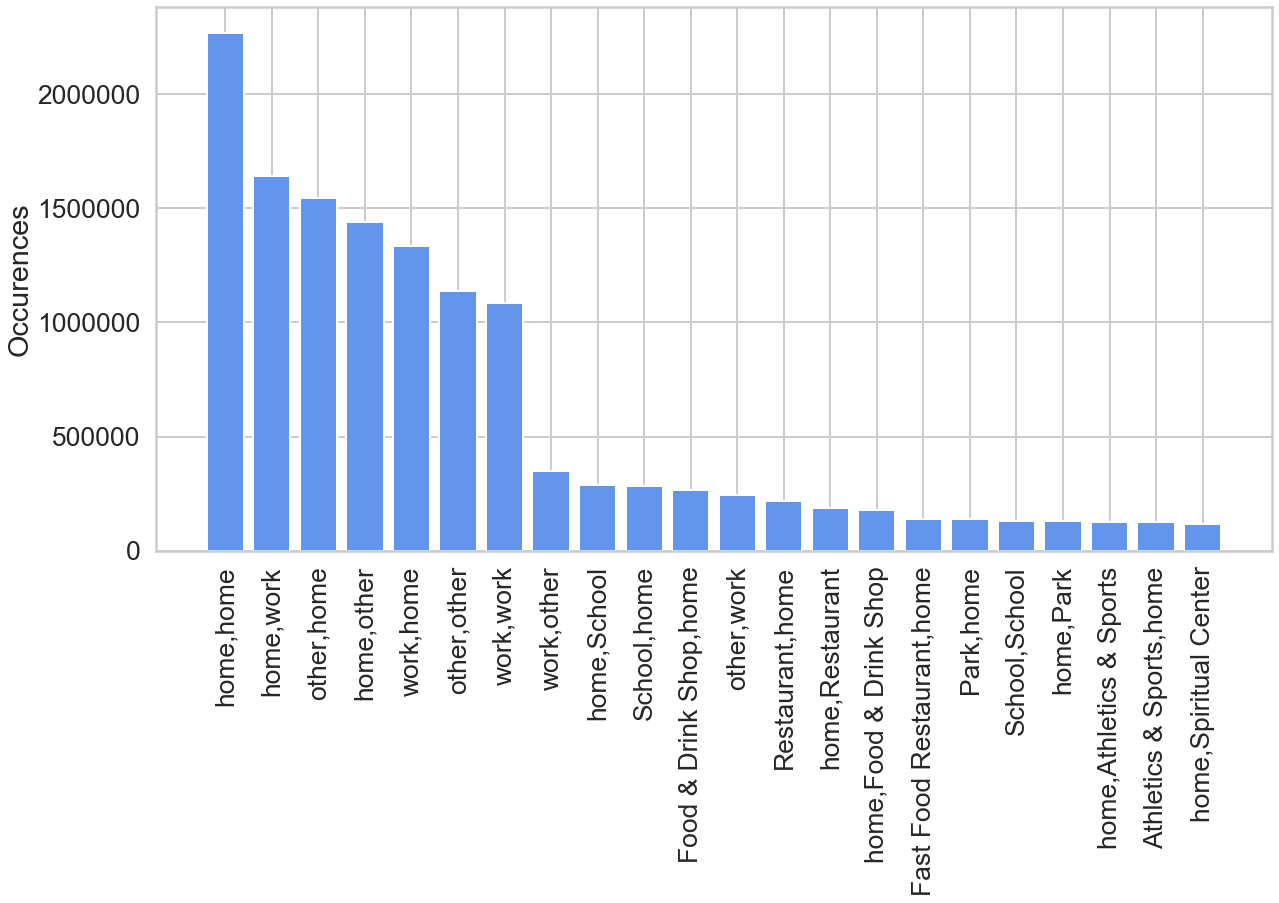

In [7]:
#plot occurence of bigram
os.chdir("/Users/Ellen/Documents/Dokumenter/DTU/7. Semester/Bachelor/Plots")
plt.bar(list(bigram2), bigram2.values(), color='cornflowerblue')
plt.xticks(rotation=90)
plt.ylabel('Occurences')
plt.savefig('bigram.png', bbox_inches='tight') #Save plot
plt.show()

In [8]:
#dict to data frame
dfStop = pd.DataFrame.from_dict(bigram, orient='index')
df1Stop = pd.DataFrame.from_dict(bigram1, orient='index')
df2Stop = pd.DataFrame.from_dict(bigram2, orient='index')

#rename column
dfStop = dfStop.rename(columns = {0: 'Occurrence'})
df1Stop = df1Stop.rename(columns = {0: 'Occurrence'})
df2Stop = df2Stop.rename(columns = {0: 'Occurrence'})

In [9]:
stops = df2.groupby('Stop').size().reset_index().rename(columns = {0: 'Occurrence'})

In [10]:
stops

,Stop,Occurrence
0,"ATM,ATM",1089
1,"ATM,Airport",10
2,"ATM,Art Gallery",4
3,"ATM,Arts & Crafts Store",11
4,"ATM,Athletics & Sports",99
...,...,...
15381,"work,Winery",12
15382,"work,Zoo",170
15383,"work,home",1336266
15384,"work,other",347689


In [11]:
#Computes probability of stops
dfStop['Probability'] = dfStop.Occurrence/dfStop.sum()['Occurrence']
df1Stop['Probability'] = df1Stop.Occurrence/df1Stop.sum()['Occurrence']
df2Stop['Probability'] = df2Stop.Occurrence/df2Stop.sum()['Occurrence']
stops['Probability'] = stops['Occurrence']/stops.sum()['Occurrence']

In [12]:
#reset index, and rename bigrams as Stop
dfStop = dfStop.reset_index().rename(columns = {'index': 'Stop'}).sort_values(by=['Probability'], ascending = False)
df1Stop = df1Stop.reset_index().rename(columns = {'index': 'Stop'}).sort_values(by=['Probability'], ascending = False)
df2Stop = df2Stop.reset_index().rename(columns = {'index': 'Stop'}).sort_values(by=['Probability'], ascending = False)

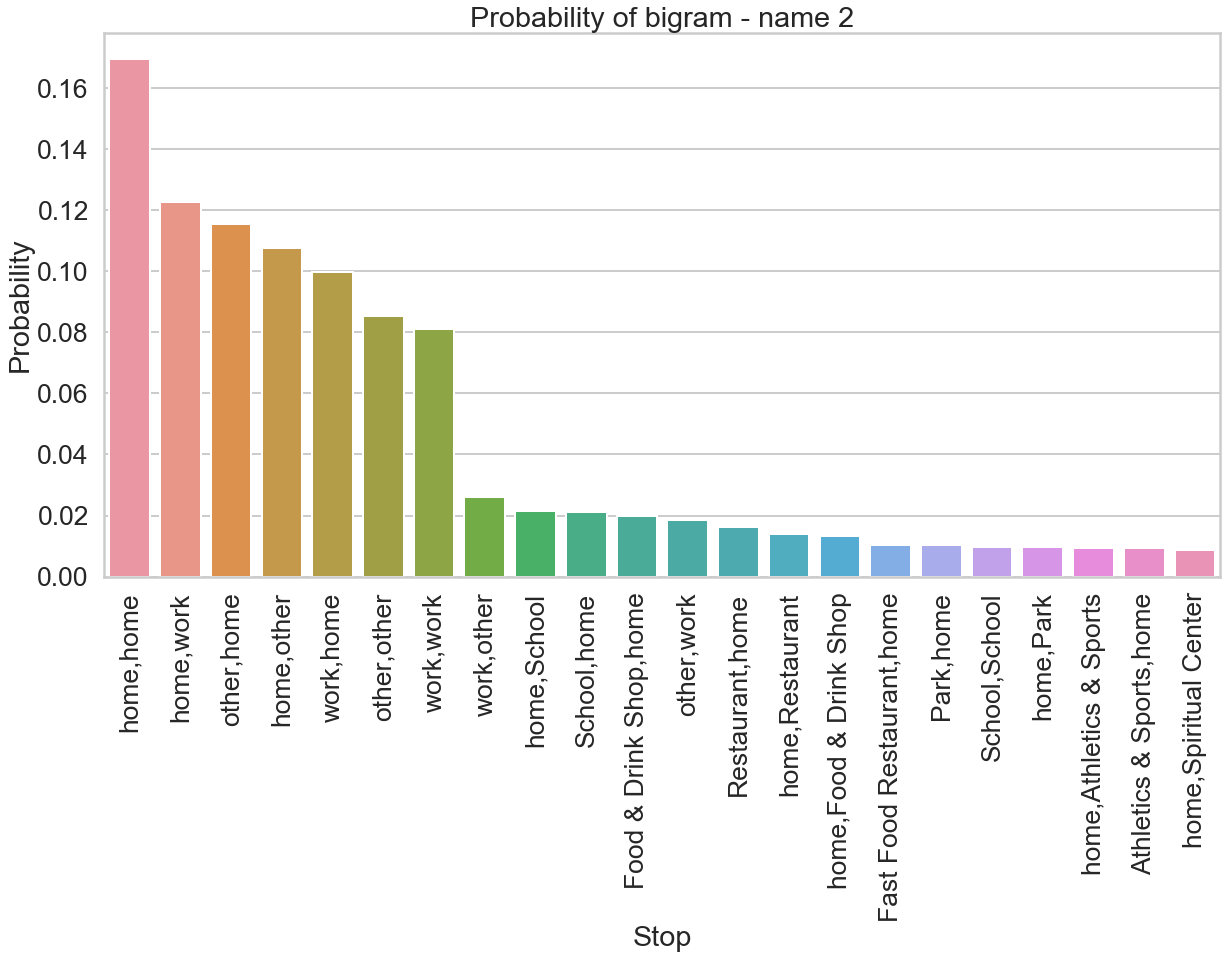

In [13]:
sns.barplot(x = 'Stop', y = 'Probability', data=df2Stop).set(title='Probability of bigram - name 2')
plt.xticks(rotation=90)
plt.show()

In [14]:
#Occurence of bigram(for each user and each bigram)
bigramOccurence = userdf.groupby(['userId', 'Stops']).size().reset_index().rename(columns={0: "Occurence"})

In [15]:
#count number of bigrams for each user
bigramCount = userdf.groupby('userId').count()['Stops'].reset_index().rename(columns={'Stops': 'StopCount'})

In [16]:
bigramOccurence = pd.merge(bigramOccurence, bigramCount, on='userId')

In [17]:
bigramOccurence

,userId,Stops,Occurence,StopCount
0,0,"Bank,Medical Center",1,198
1,0,"Bank,School",2,198
2,0,"Bank,home",5,198
3,0,"Bank,other",1,198
4,0,"Bar,Beach",1,198
...,...,...,...,...
4920156,403726927905,"home,Lawyer",2,64
4920157,403726927905,"home,Park",1,64
4920158,403726927905,"home,School",1,64
4920159,403726927905,"home,Shopping Mall",1,64


In [18]:
#Occurence/bigram
bigramOccurence['Occurence/bigram'] = bigramOccurence['Occurence']/bigramOccurence['StopCount']

In [19]:
bigramOccurence

,userId,Stops,Occurence,StopCount,Occurence/bigram
0,0,"Bank,Medical Center",1,198,0.005051
1,0,"Bank,School",2,198,0.010101
2,0,"Bank,home",5,198,0.025253
3,0,"Bank,other",1,198,0.005051
4,0,"Bar,Beach",1,198,0.005051
...,...,...,...,...,...
4920156,403726927905,"home,Lawyer",2,64,0.031250
4920157,403726927905,"home,Park",1,64,0.015625
4920158,403726927905,"home,School",1,64,0.015625
4920159,403726927905,"home,Shopping Mall",1,64,0.015625


In [20]:
#10 most frequent
bigramOccurence.groupby(['Stops', 'Occurence/bigram']).size().reset_index().rename(columns={0: 'Count'}).nlargest(10, 'Count')

,Stops,Occurence/bigram,Count
1143946,"other,home",0.111111,312
1142244,"other,home",0.083333,305
1143280,"other,home",0.100000,302
1141847,"other,home",0.076923,292
1046392,"home,other",0.076923,285
1142731,"other,home",0.090909,283
1141182,"other,home",0.066667,275
1047842,"home,other",0.100000,265
1045722,"home,other",0.066667,260
1145621,"other,home",0.142857,253


In [21]:
df2.groupby('Stop').size().reset_index().rename(columns={0: 'Occurence'})

,Stop,Occurence
0,"ATM,ATM",1089
1,"ATM,Airport",10
2,"ATM,Art Gallery",4
3,"ATM,Arts & Crafts Store",11
4,"ATM,Athletics & Sports",99
...,...,...
15381,"work,Winery",12
15382,"work,Zoo",170
15383,"work,home",1336266
15384,"work,other",347689
